# EEE3092F Assignment 1 - Julia Exercises_Section_2.1_2.3

#### PLAGIARISM STATEMENT

I certify that this assignment/report is my own work, based on my personal
study and/or research and that I have acknowledged all material and sources
used in its preparation, and that I
have not copied in part or whole or otherwise plagiarised the work of other
students and/or persons.

Name: Nkosinathi Ntuli (NTLNKO007)

Date: 13 March 2022

### Exercise 2.x.1 - Energy via integration

In [1]:
using Pkg

In [ ]:
Pkg.add(["Plots", "PlotlyBase"])


In [3]:
using Plots
#plotly() 
# commenting out plotly and use gr to reduce the file size for submission
gr()

Plots.GRBackend()

a) Calculate the energy via numerical integration.

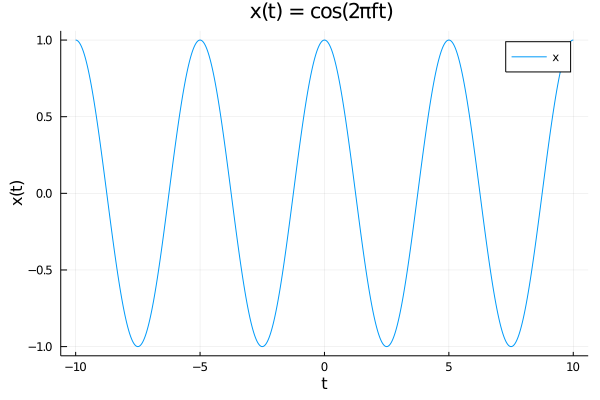

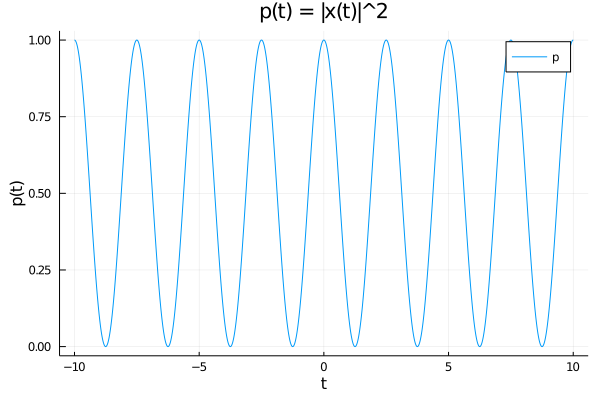

Energy = ∫|x(t)|^2.dt = 10.001


In [4]:
t1=-10 ; t2= 10 ; Δt= 0.001 ;
t=t1:Δt:t2; # or use t=range(t1, t2, step=Δt)

function my_function(t, f)
    r = cos.(2 * π * f * t)
    return r
end

x = my_function(t, 0.2) # fill an array x with function values
ipower = (abs.(x)).^2 # instantaneous power
energy = sum(ipower)*Δt # Calculate energy by integration

#default(size=(600,300))
#figure()
fig = plot(t, x, ticks=:native, label = "x", title = "x(t) = cos(2πft) \n", xlabel = "t", ylabel = "x(t)");
display(fig);

fig = plot(t, ipower, ticks=:native, label = "p", title = "p(t) = |x(t)|^2", xlabel = "t", ylabel = "p(t)")
display(fig)
println("Energy = ∫|x(t)|^2.dt = ",energy)


b) Calculate the energy of a sinusoidal pulse of length T=1 second, and frequency f=6Hz, and amplitude A=10. 

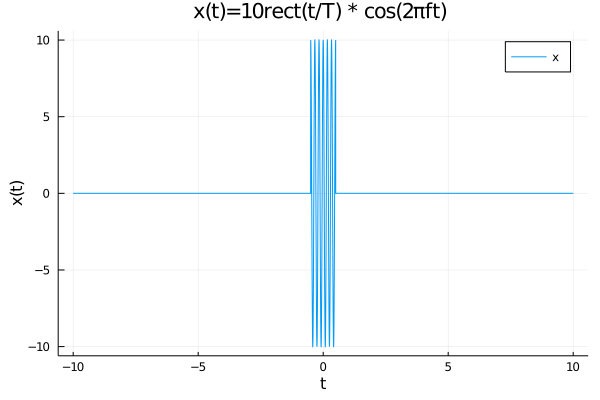

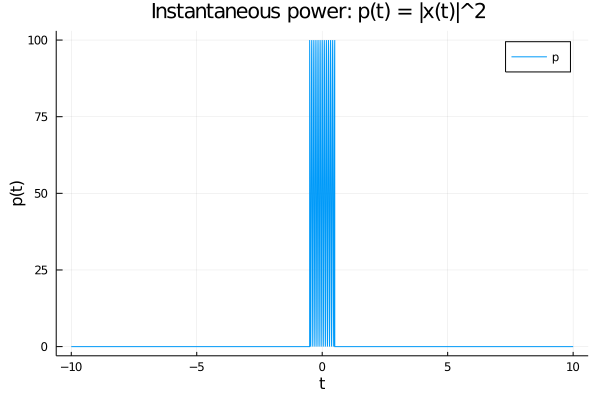

The energy is = 50.10000000000001


In [5]:
f0 = 6
A = 10
T = 1
rect(t)=(abs.(t).<=0.5).*1.0

x_t=A*rect(t/T).*cos.(2*π*f0*t)

p = (abs.(x_t)).^2 # instantaneous power
E = sum(p)*Δt # Calculate energy by integration
println("The energy is = $E")


fig = plot(t, x_t, ticks=:native, label = "x", title = "x(t)=10rect(t/T) * cos(2πft) \n", xlabel = "t", ylabel = "x(t)");
display(fig);

fig = plot(t, p, ticks=:native, label = "p", title = "Instantaneous power: p(t) = |x(t)|^2 \n", xlabel = "t", ylabel = "p(t)")
display(fig)



c) Calculate the energy of the impulse response of an ideal LPF of unit-gain and bandwidth B=1Hz

In [6]:
function h_t(t, B)
    x = 2π * B * t
    h = 2 * B * sin.(x)./x
    md = convert(Int64, floor(length(h) / 2)) + 1
    h[md]=2*B
    return h
end

# B = 1 Hz in this case
t0=-10:0.001:10
h0 = h_t(t0, 1)

x0=1*rect(t0/T).*h0

p0 = (abs.(x0)).^2 # instantaneous power
E0 = sum(p0)*0.001 # Calculate energy by integration
println("The energy is = $E0")

The energy is = 1.8056466671616278


### Exercise 2.x.2 - Plotting filter impulse response

a) Plot the waveform _h(t)=2*B*Sa(2*π*B*t)_ for case B = 1Hz.

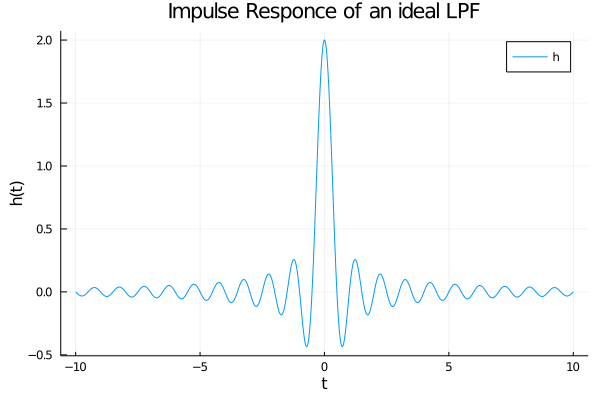

In [7]:
# Using h(t) from question 2.1

B = 1 
t = - 10 * B: 0.001 : 10 * B

h = h_t(t,B)

fig = plot(t, h, ticks=:native, label = "h", title = "Impulse Responce of an ideal LPF", xlabel = "t", ylabel = "h(t)");
display(fig);

b) By inspection of the waveform (and/or samples displayed) determine the approximate width of the main lobe, measured between the 3dB points.
(it should be approximately δt ≈0.44/B)

In [8]:
function half_3dB_width(func, val)
    k = 1;
    len = length(func);
    while k <= len
        if func[k] >= val
            return t[k]
        end
        k += 1
    end
    return 0
end

#δt = 0.44 / B
δt = 2 * abs(half_3dB_width(h, 2 * B * 0.707))


println("The 3dB Width is: δt ≈ $δt");

The 3dB Width is: δt ≈ 0.442


c) Plot the impulse response of an ideal BPF, of bandwidth B and centre frequency ω0. Specify B = 1Hz and centre frequency f = 4Hz.

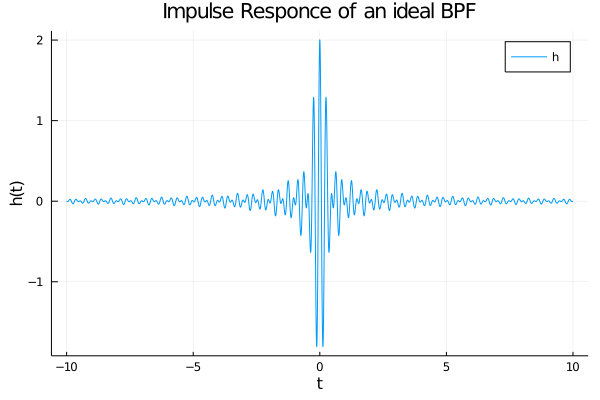

In [9]:
f1 = 4
w0 = 2 * π * f1 
B = 1
t1 = -10: 0.001 : 10

#T = 2 * π * B
#w = -1.2 * w0 : 0.1 : 1.2 * w0
#Hw = rect.((w .+ w0)/T) + rect.((w .- w0)/T)

h1= h_t(t1, B) .* cos.(w0 .* t1)

fig = plot(t1, h1, ticks=:native, label = "h", title = "Impulse Responce of an ideal BPF", xlabel = "t", ylabel = "h(t)");
display(fig);

### Exercise 2.x.3 - Step response via integration

a) Calculate and plot the step response of an ideal LPF for case B=1 Hz. The impulse response is _h(t)=2*B*Sa(2*π*B*t)_

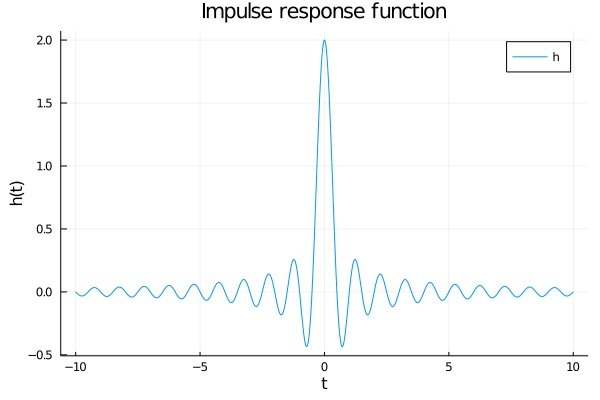

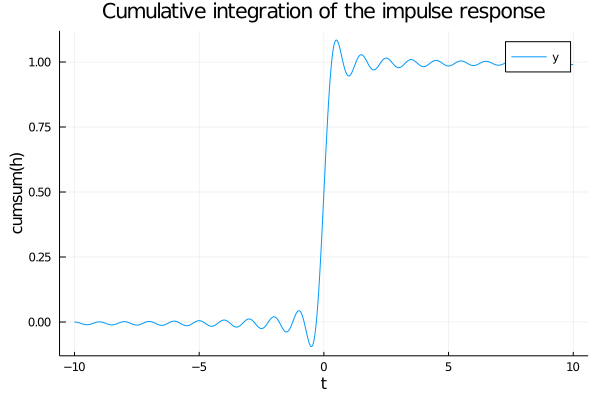

In [10]:
Δτ = 0.001
t2=-10:Δτ:10
B = 1

#t0 = t1
#t_Δ = t0 .+ Δτ * t


h2 = h_t(t2, B) # impulse response function
#println(h2)
y = cumsum(h2)*Δτ # cumulatively integrate

fig = plot(t2, h2, ticks=:native, label = "h", title = "Impulse response function", xlabel = "t", ylabel = "h(t)");
display(fig);

fig = plot(t2, y, ticks=:native, label = "y", title = "Cumulative integration of the impulse response", xlabel = "t", ylabel = "cumsum(h)");
display(fig);

b) By inspection/analysis of the step response, determine the 10% to 90% rise time. Does the value agree with the value stated in Section 2.2. of the lecture notes? i.e. tr = 0.446/B ≈ 1/(2B).

In [11]:
rise_t = half_3dB_width(y, 0.9) - half_3dB_width(y, 0.1)
rise_time = 0.446 / B

println("The observed rise time  is $rise_t");
println("The value of 0.446/B = $rise_time")

The observed rise time  is 0.446
The value of 0.446/B = 0.446


Yes.


### Exercise 2.4 - Plotting Periodic functions

a) Plot the function _4*cos(20*π*t)_ as a function of t over a specified interval from t1 to t2
with a specified time step Δt

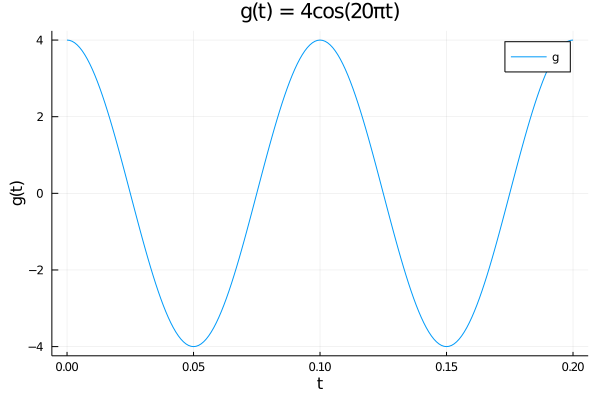

In [12]:
t3= 0 : 0.001: 0.2
g = 4*cos.(20π*t3)


fig = plot(t3, g, ticks=:native, label = "g", title = "g(t) = 4cos(20πt)", xlabel = "t", ylabel = "g(t)");
display(fig);

b) Plot the function 2*cos(30*π*t) over the same interval

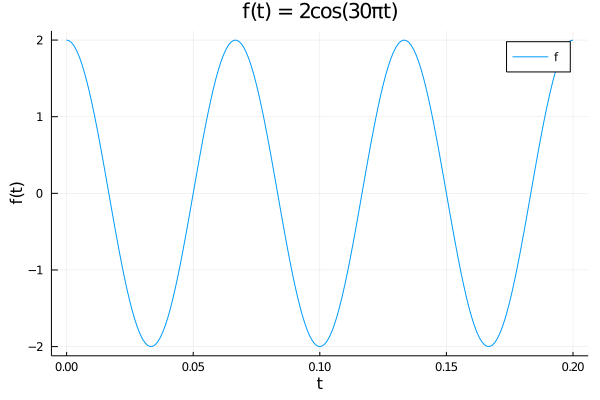

In [13]:
f = 2*cos.(30π*t3)

fig = plot(t3, f, ticks=:native, label = "f", title = "f(t) = 2cos(30πt)", xlabel = "t", ylabel = "f(t)");
display(fig);

c) Plot _v(t) = 4*cos(20*π*t) + 2*cos(30*π*t)_ over the same interval

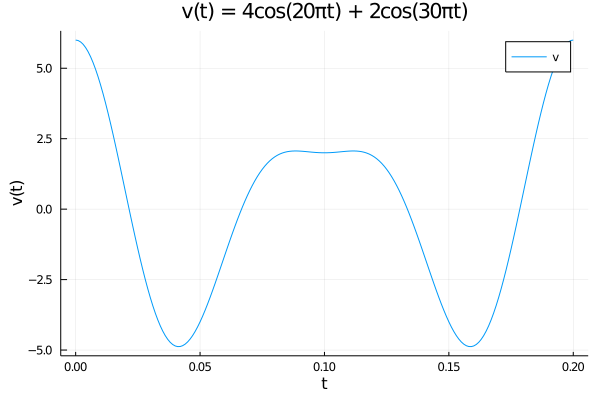

In [14]:
v = g .+ f

fig = plot(t3, v, ticks=:native, label = "v", title = "v(t) = 4cos(20πt) + 2cos(30πt)", xlabel = "t", ylabel = "v(t)");
display(fig);

d) By inspection of your plot, determine the period of the waveform v(t) in seconds, and use it to calculate the fundamental frequency. 

In [15]:
period = 0.2


println("Period : $period s")
println("Fundamental Frequency : $(1 / period) Hz")

Period : 0.2 s
Fundamental Frequency : 5.0 Hz


### Exercise 2.x.5 – Plotting Magnitude and Phase

a)  Plot the magnitude using function call abs.()

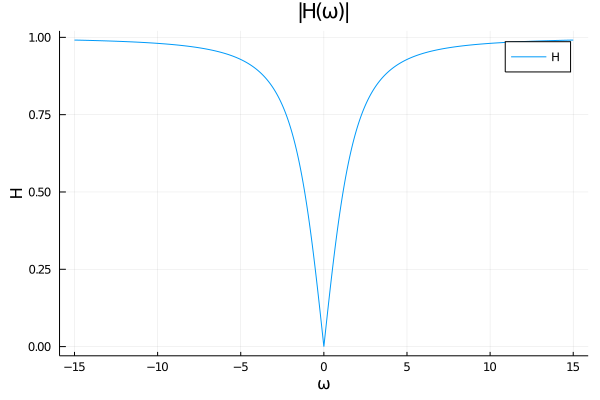

In [16]:
R = 1
C = 0.5

Δω = 0.001
ω = -15:Δω:15

H(ω)= (ω*R*C)im/(1+(ω*R*C)im)

H1 = abs.(H.(ω))

fig = plot(ω, H1, ticks=:native, label = "H", title = "|H(ω)|", xlabel = "ω", ylabel = "H");
display(fig);

b) Plot the phase using function angle.()

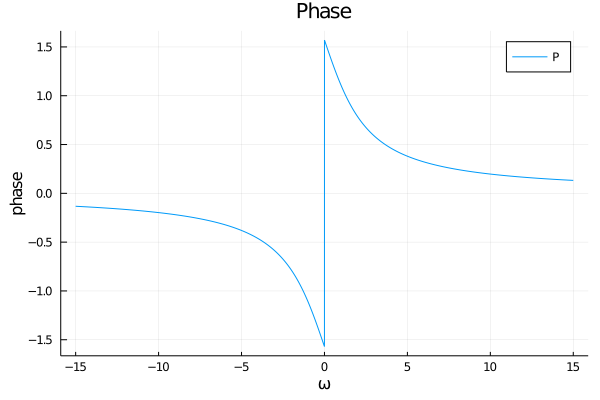

In [17]:
P = angle.(H.(ω))

fig = plot(ω, P, ticks=:native, label = "P", title = "Phase", xlabel = "ω", ylabel = "phase");
display(fig);

c)  Plot the real part using function real()

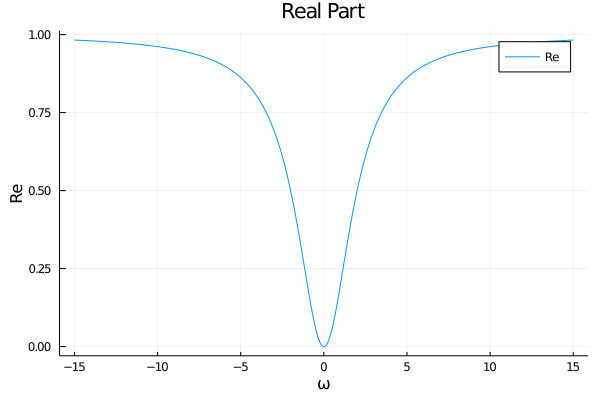

In [18]:
Re = real.(H.(ω))

fig = plot(ω, Re, ticks=:native, label = "Re", title = "Real Part", xlabel = "ω", ylabel = "Re");
display(fig);

d) Plot the imaginary part using function imag()

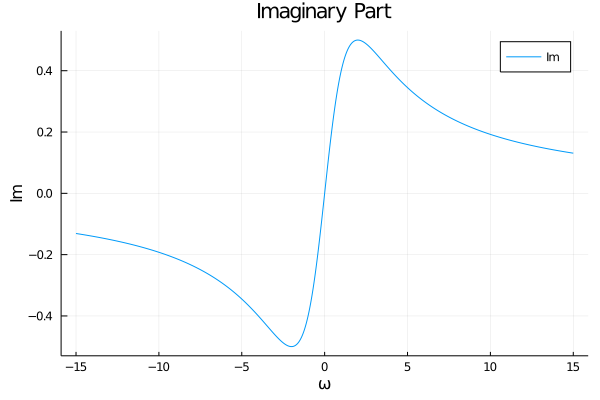

In [19]:
Im = imag.(H.(ω))

fig = plot(ω, Im, ticks=:native, label = "Im", title = "Imaginary Part", xlabel = "ω", ylabel = "Im");
display(fig);

e)  Determine |H(ωc)| and calculate the ratio |H(inf)|/|H(ωc)| where H(inf)=limω→∞ H (ω) also convert the ratio to dB.

In [20]:
mag = abs(H(1/(R*C))) # |H(ωc)| 
println("|H(ωc)| = $mag \n")

infinity = round(abs(H(BigInt(typemax(Int64)))), digits=5, base=4) # |H(inf)|
println("|H(inf)| = $infinity\n")

ratio = round(infinity/mag, digits=5, base=4)

println("|H(inf)|/|H(ωc)| = $ratio\n")

r_dB = round(10*log10(ratio), digits=5, base=4)

println("The ratio in dB = $r_dB")

|H(ωc)| = 0.7071067811865476 

|H(inf)| = 1.0

|H(inf)|/|H(ωc)| = 1.4140625

The ratio in dB = 1.5048828125
